In [3]:
fred_api_key = ''

In [ ]:
!pip install fredapi yfinance

In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Set your FRED API key
# fred_api_key = "your_fred_api_key"
fred = Fred(api_key=fred_api_key)



In [19]:
# Download M2 data from FRED
m2_data = fred.get_series("WM2NS", observation_start='1/1/2015')
print(m2_data.head(3))

# Download Bitcoin and S&P 500 data from Yahoo Finance
btc_data = yf.download("BTC-USD", start="2015-01-01", interval="1mo")['Adj Close']
sp500_data = yf.download("^GSPC", start="2015-01-01", interval="1mo")['Adj Close']

# Resample data to monthly and forward fill missing values
m2_data = m2_data.resample('M').last().ffill()
btc_data = btc_data.resample('M').last().ffill()
sp500_data = sp500_data.resample('M').last().ffill()

# Merge data into a single DataFrame
merged_data = pd.concat([m2_data, btc_data, sp500_data], axis=1)
merged_data.columns = ['M2', 'BTC', 'S&P 500']

merged_data.head()

2015-01-05    11820.4
2015-01-12    11797.6
2015-01-19    11752.4
dtype: float64
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,M2,BTC,S&P 500
2015-01-31,11677.4,217.464005,1994.989990
2015-02-28,11840.5,254.263000,2104.500000
2015-03-31,11960.9,244.223999,2067.889893
2015-04-30,11852.8,236.145004,2085.510010
2015-05-31,11873.4,230.190002,2107.389893


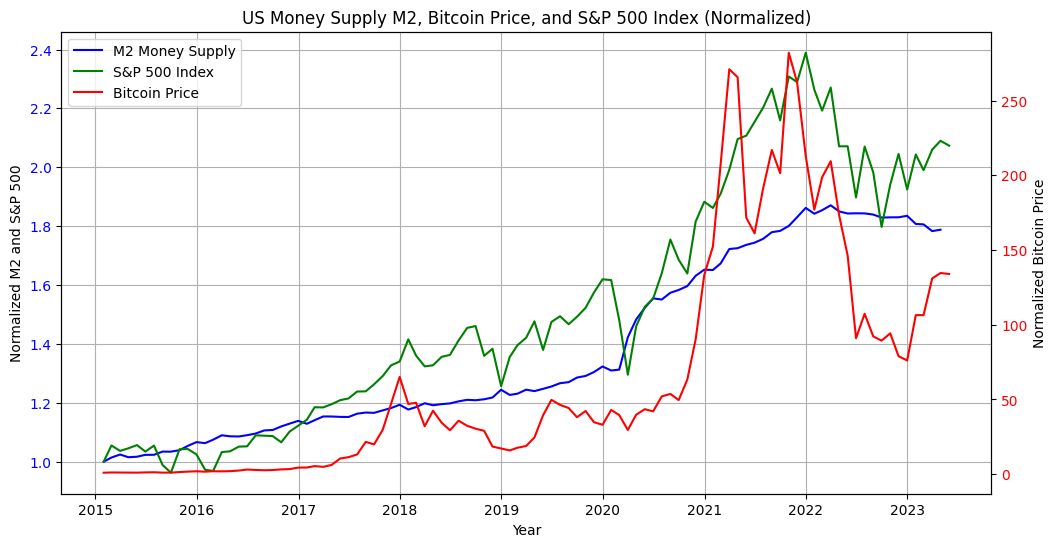

In [20]:
# Normalize the data
normalized_data = merged_data / merged_data.iloc[0]

# Plot the line chart with BTC on the right axis
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(normalized_data.index, normalized_data['M2'], label='M2 Money Supply', color='blue')
ax1.plot(normalized_data.index, normalized_data['S&P 500'], label='S&P 500 Index', color='green')

ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
ax2.plot(normalized_data.index, normalized_data['BTC'], label='Bitcoin Price', color='red')

# Customize axis labels
ax1.set_xlabel('Year')
ax1.set_ylabel('Normalized M2 and S&P 500', color='black')
ax2.set_ylabel('Normalized Bitcoin Price', color='black')

# Set axis colors to match line colors
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

# Set grid and legend
ax1.grid()
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('US Money Supply M2, Bitcoin Price, and S&P 500 Index (Normalized)')
plt.show()



# First-order difference: growth rate

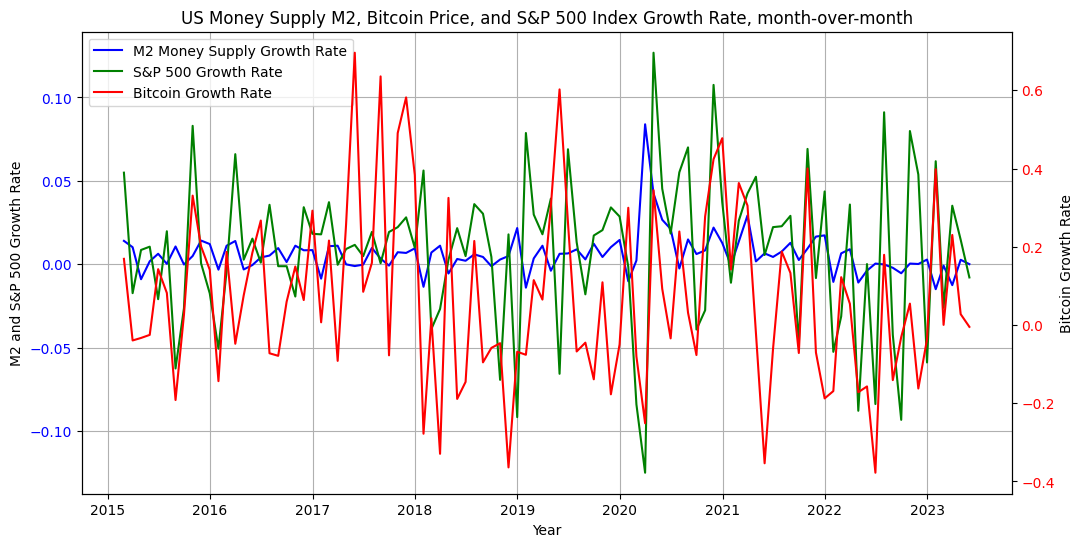

In [22]:
# Calculate the growth rate (first-order difference)
growth_rate_data = normalized_data.pct_change()

# Plot the line chart with growth rates and BTC on the right axis
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(growth_rate_data.index, growth_rate_data['M2'], label='M2 Money Supply Growth Rate', color='blue')
ax1.plot(growth_rate_data.index, growth_rate_data['S&P 500'], label='S&P 500 Growth Rate', color='green')

ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
ax2.plot(growth_rate_data.index, growth_rate_data['BTC'], label='Bitcoin Growth Rate', color='red')

# Customize axis labels
ax1.set_xlabel('Year')
ax1.set_ylabel('M2 and S&P 500 Growth Rate', color='black')
ax2.set_ylabel('Bitcoin Growth Rate', color='black')

# Set axis colors to match line colors
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

# Set grid and legend
ax1.grid()
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('US Money Supply M2, Bitcoin Price, and S&P 500 Index Growth Rate, month-over-month')
plt.show()


# 2020 based

2020-01-06    15484.9
2020-01-13    15452.8
2020-01-20    15406.7
dtype: float64
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


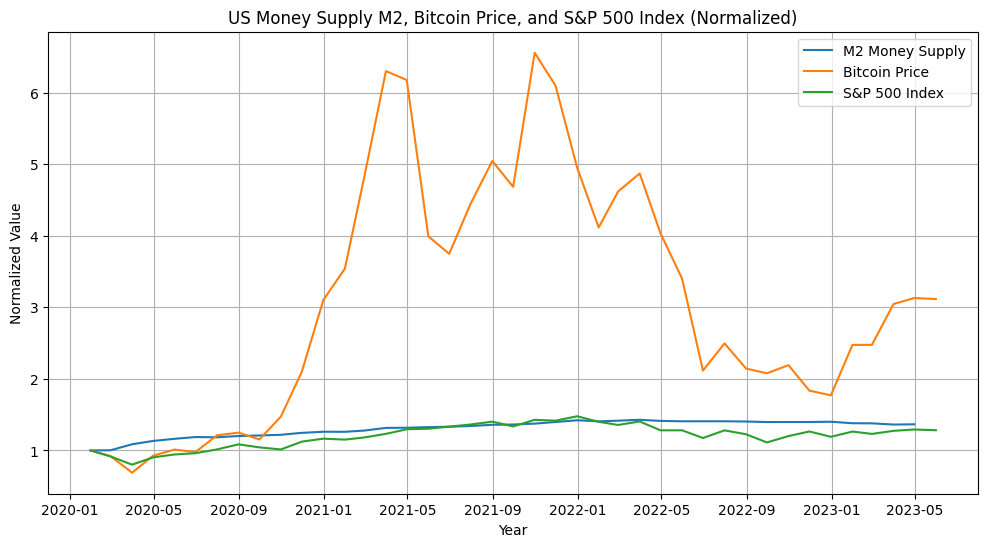

In [14]:
# Download M2 data from FRED
m2_data = fred.get_series("WM2NS", observation_start='1/1/2020')

# Download Bitcoin and S&P 500 data from Yahoo Finance
btc_data = yf.download("BTC-USD", start="2020-01-01", interval="1mo")['Adj Close']
sp500_data = yf.download("^GSPC", start="2020-01-01", interval="1mo")['Adj Close']

# Resample data to monthly and forward fill missing values
m2_data = m2_data.resample('M').last().ffill()
btc_data = btc_data.resample('M').last().ffill()
sp500_data = sp500_data.resample('M').last().ffill()

# Merge data into a single DataFrame
merged_data = pd.concat([m2_data, btc_data, sp500_data], axis=1)
merged_data.columns = ['M2', 'BTC', 'S&P 500']

# Normalize the data
normalized_data = merged_data / merged_data.iloc[0]

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(normalized_data.index, normalized_data['M2'], label='M2 Money Supply')
plt.plot(normalized_data.index, normalized_data['BTC'], label='Bitcoin Price')
plt.plot(normalized_data.index, normalized_data['S&P 500'], label='S&P 500 Index')

plt.title('US Money Supply M2, Bitcoin Price, and S&P 500 Index (Normalized)')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()

plt.show()